# ZOO

In [1]:
# Імпортуємо бібліотеки
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
%matplotlib inline

In [2]:
# Імпортумо датасет
df = pd.read_csv('zoo.csv')

# ---------------------------------------------------------------------------------------------- 

Розгялнемо наш датасет

In [3]:
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
df.shape

(101, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
animal_name    101 non-null object
hair           101 non-null int64
feathers       101 non-null int64
eggs           101 non-null int64
milk           101 non-null int64
airborne       101 non-null int64
aquatic        101 non-null int64
predator       101 non-null int64
toothed        101 non-null int64
backbone       101 non-null int64
breathes       101 non-null int64
venomous       101 non-null int64
fins           101 non-null int64
legs           101 non-null int64
tail           101 non-null int64
domestic       101 non-null int64
catsize        101 non-null int64
class_type     101 non-null int64
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [6]:
df.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

In [7]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


# ---------------------------------------------------------------------------------------------- 

Намалюємо кілька графіків 

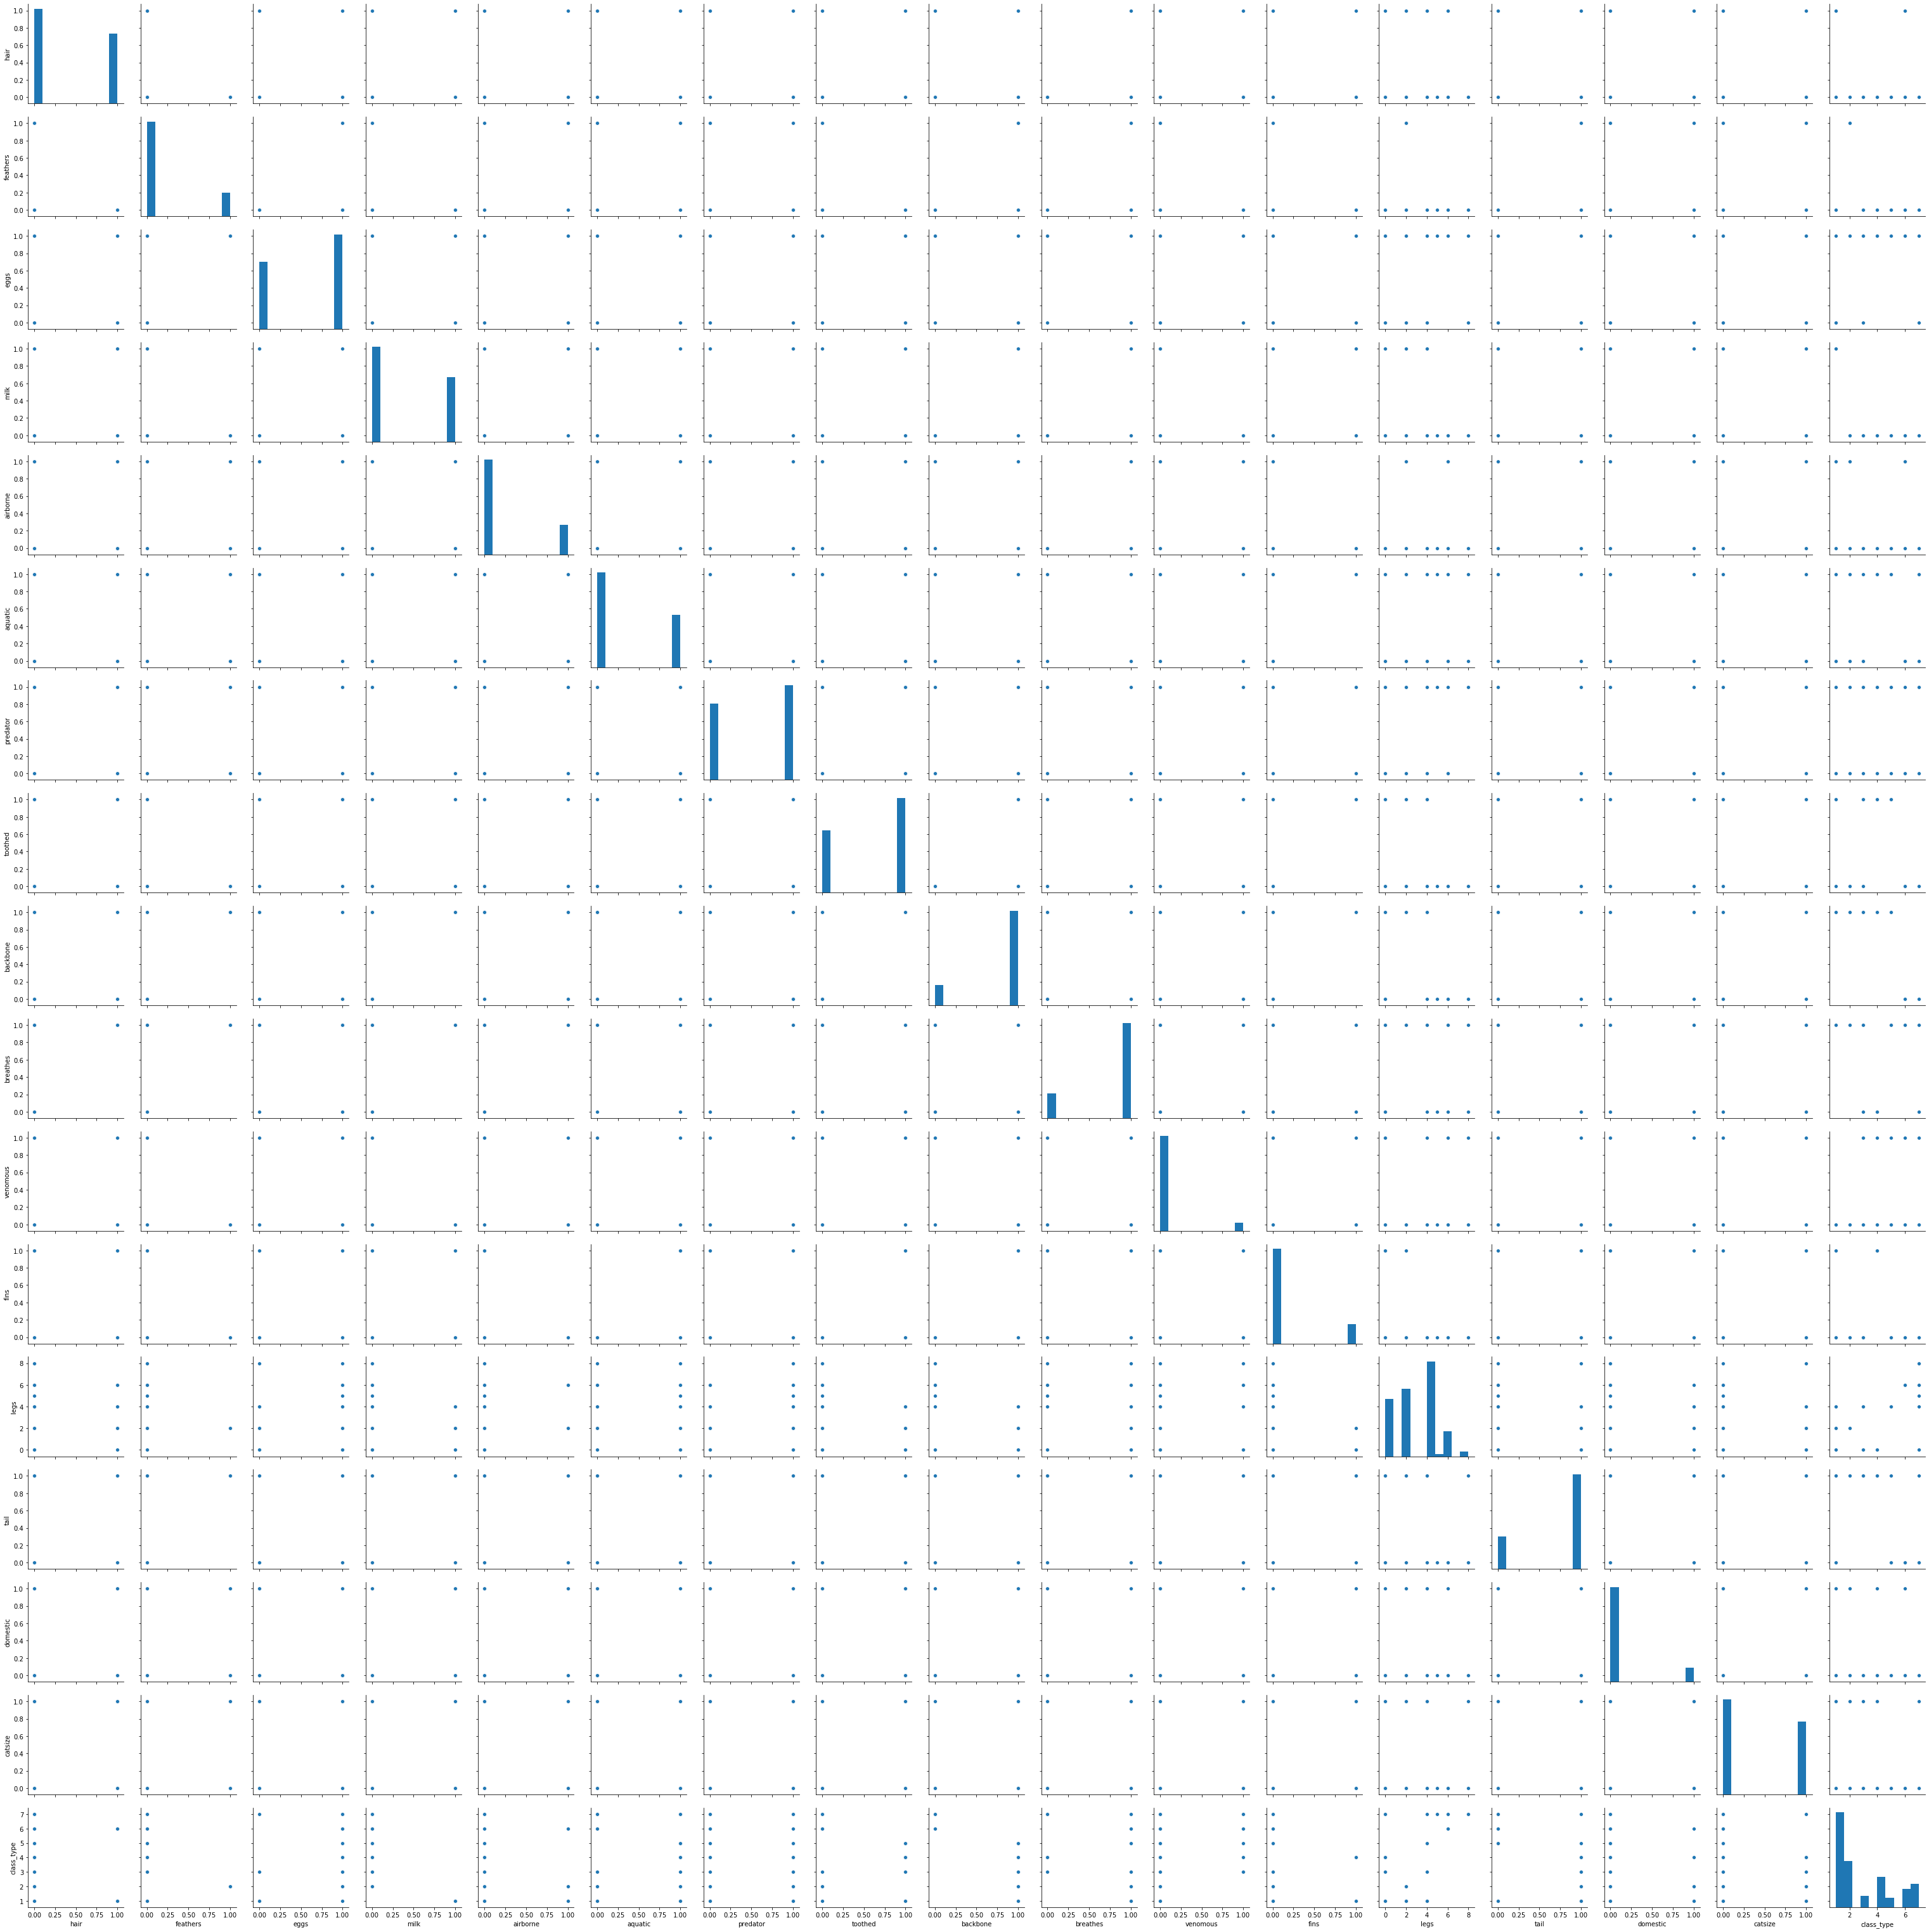

In [8]:
sns.pairplot(df)
plt.style.use('dark_background')
plt.show()

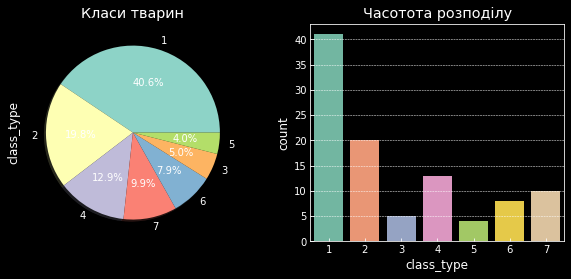

In [9]:
plt.style.use("bmh")
plt.style.use('dark_background')
f,ax = plt.subplots(1,2,figsize=(10,4))
ax[1] = df['class_type'].value_counts().plot.pie(explode=[0,0,0,0,0,0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[1].set_title('Класи тварин')
ax[0] = sns.countplot(x="class_type", data=df, palette="Set2")
ax[0].set_title("Часотота розподілу")
plt.show()

# ---------------------------------------------------------------------------------------------- 

Частотні розподіли

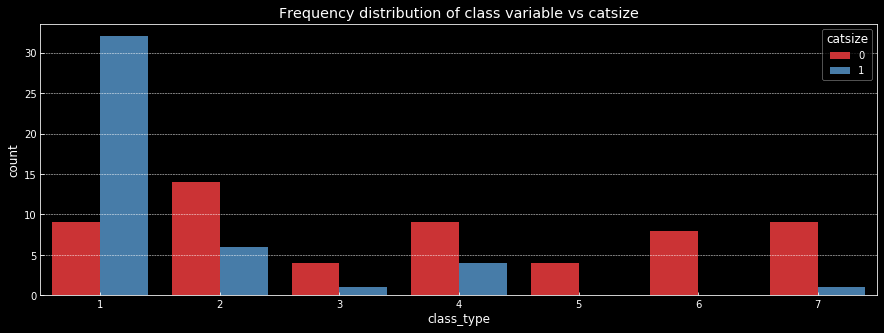

In [10]:
plt.style.use("bmh")
plt.style.use('dark_background')
f, ax = plt.subplots(figsize=(15, 5))
ax = sns.countplot(x="class_type", hue="catsize", data=df, palette="Set1")
ax.set_title("Frequency distribution of class variable vs catsize")
plt.show()

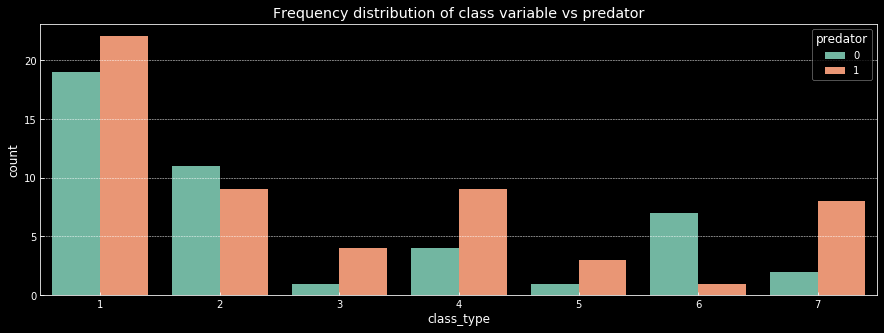

In [11]:
plt.style.use("bmh")
plt.style.use('dark_background')
f, ax = plt.subplots(figsize=(15, 5))
ax = sns.countplot(x="class_type", hue="predator", data=df, palette="Set2")
ax.set_title("Frequency distribution of class variable vs predator")
plt.show()

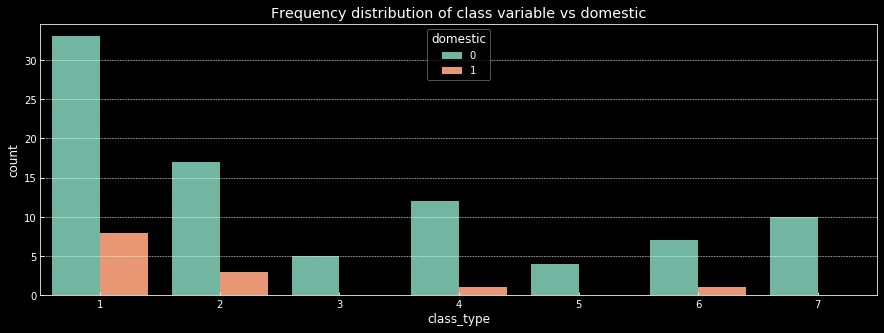

In [12]:
plt.style.use("bmh")
plt.style.use('dark_background')
f, ax = plt.subplots(figsize=(15, 5))
ax = sns.countplot(x="class_type", hue="domestic", data=df, palette="Set2")
ax.set_title("Frequency distribution of class variable vs domestic")
plt.show()

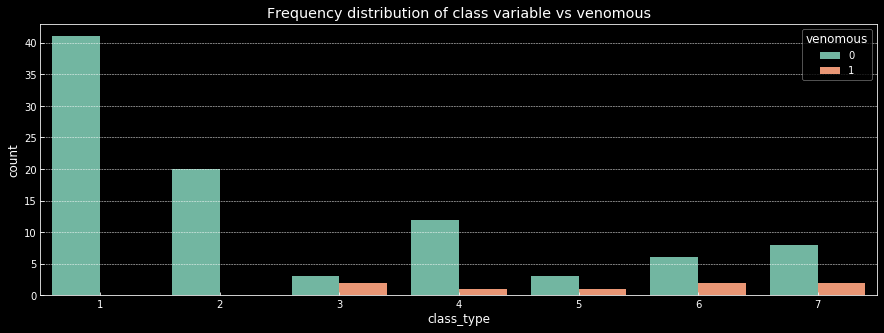

In [13]:
plt.style.use("bmh")
plt.style.use('dark_background')
f, ax = plt.subplots(figsize=(15, 5))
ax = sns.countplot(x="class_type", hue="venomous", data=df, palette="Set2")
ax.set_title("Frequency distribution of class variable vs venomous")
plt.show()

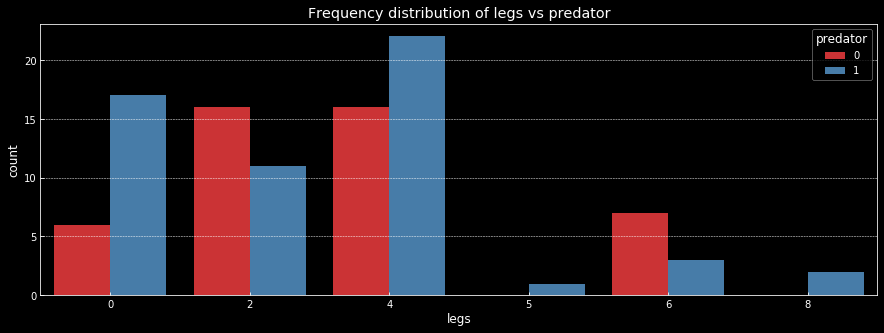

In [14]:
plt.style.use("bmh")
plt.style.use('dark_background')
f, ax = plt.subplots(figsize=(15, 5))
ax = sns.countplot(x="legs", hue="predator", data=df, palette="Set1")
ax.set_title("Frequency distribution of legs vs predator")
plt.show()

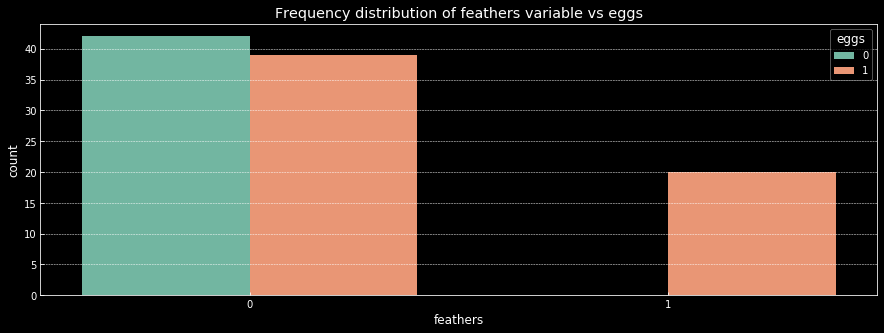

In [15]:
plt.style.use("bmh")
plt.style.use('dark_background')
f, ax = plt.subplots(figsize=(15, 5))
ax = sns.countplot(x="feathers", hue="eggs", data=df, palette="Set2")
ax.set_title("Frequency distribution of feathers variable vs eggs")
plt.show()

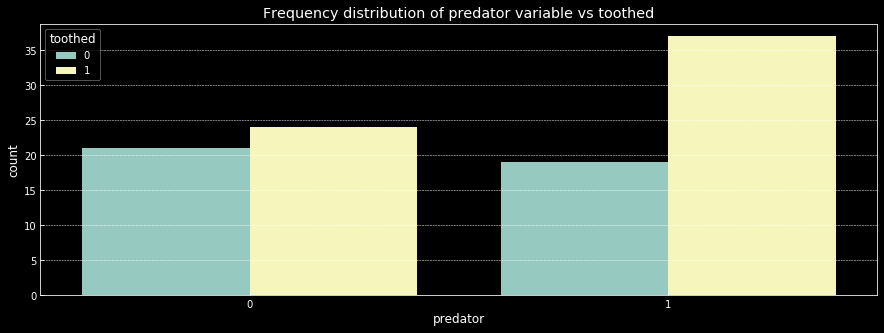

In [16]:
plt.style.use("bmh")
plt.style.use('dark_background')
f, ax = plt.subplots(figsize=(15, 5))
ax = sns.countplot(x="predator", hue="toothed", data=df, palette="Set3")
ax.set_title("Frequency distribution of predator variable vs toothed")
plt.show()

# ---------------------------------------------------------------------------------------------- 

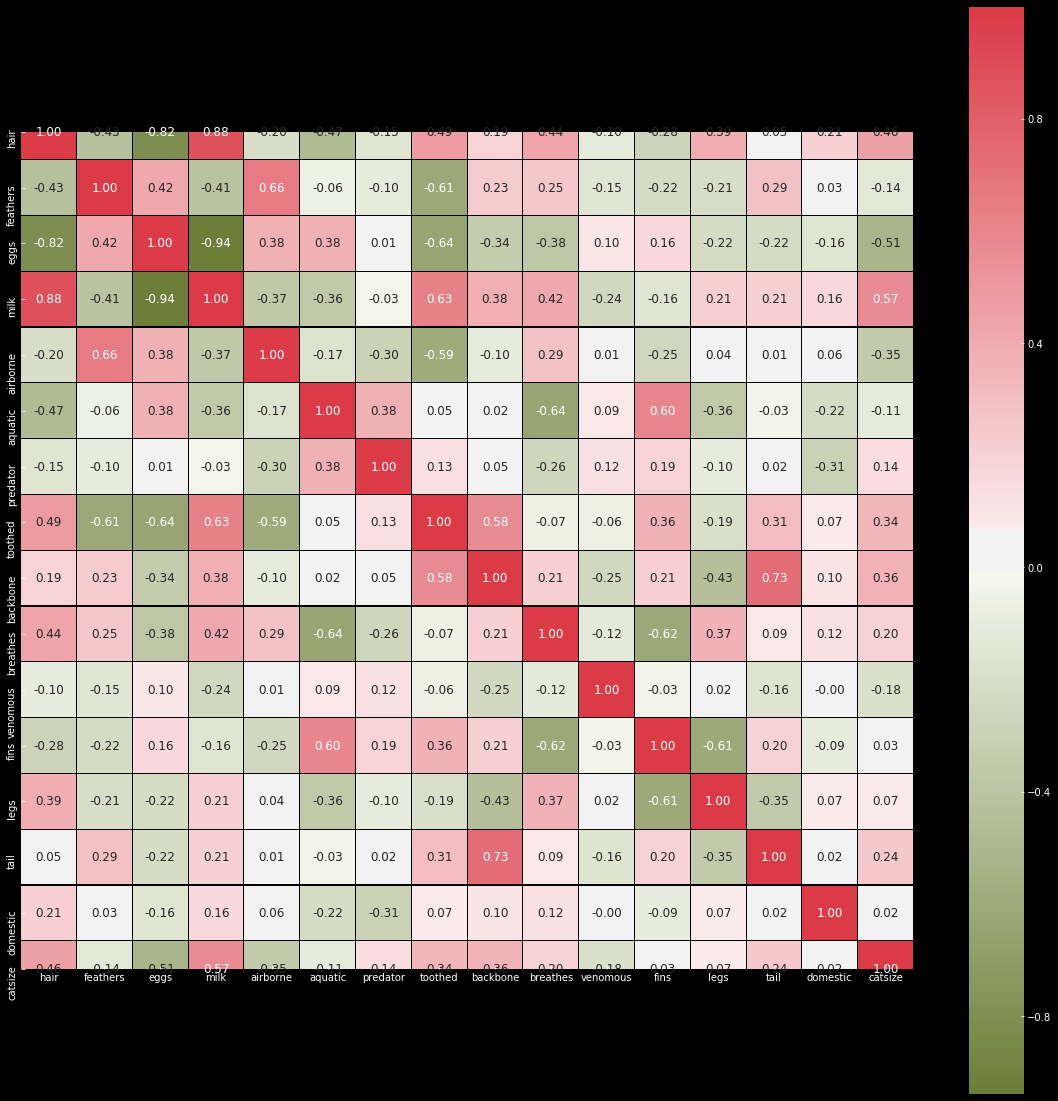

In [17]:

corr = df.iloc[:,1:-1].corr()
colormap = sns.diverging_palette(100, 10, as_cmap = True)
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 12},cmap = colormap, linewidths=0.1, linecolor='black')

# ---------------------------------------------------------------------------------------------- 

Працюємо з даними

In [18]:
# ми видалємо клас та ім'я, бо вони нам не потрібні (а на додачу ім'я не конвертуэться в float32)
features = list(df.columns)
print(features)
print("___________________________________________________")
features.remove('class_type')
features.remove('animal_name')
print(features)
print("___________________________________________________")
X = df[features].values.astype(np.float32)
y = df['class_type']
print(X.shape)
print(y.shape)

['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type']
___________________________________________________
['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']
___________________________________________________
(101, 16)
(101,)


In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print("Training: ",X_train.shape)
print("Testing: ",X_test.shape)

Training:  (70, 16)
Testing:  (31, 16)


# ---------------------------------------------------------------------------------------------- 


Custom Logistic Regression

In [20]:
def normalize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0, ddof=1)
    X_norm = (X - mean) / std
    return X_norm, mean, std



def plot_data(A, b, test = False):
    positive_indices = np.where(b == 1)[0]
    negative_indices = np.where(b == 0)[0]    
    plt.scatter(A.iloc[positive_indices, 0], A.iloc[positive_indices, 1], marker='x', c= 'yellow' if test else 'green')
    plt.scatter(A.iloc[negative_indices, 0], A.iloc[negative_indices, 1], marker='+', c= 'blue' if test else 'red')    
    plt.show()

    
    
def prepare_X(X):
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.column_stack((ones, X))
    return X_new



def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g



def h(X, theta):
    z = np.dot(X, theta)
    return sigmoid(z)



def cost_function(X, y, theta):
    m = X.shape[0]
    if m ==0:
        return None
    
    J = (-y * np.log(h(X, theta)) - (1 - y) * np.log(1 - h(X, theta))).mean()
    return J


def gradient_descent(X, y, theta, alpha, epsilon, num_iters, print_J = True):
    m = X.shape[0]
    J_history = []    
    J = cost_function(X, y, theta)    
    if print_J == True:
        print(J)
    J_history.append(J)
    for i in range(num_iters):        
        theta = theta - alpha*np.dot(X.T, (h(X, theta) - y))/m;        
        J = cost_function(X, y, theta)        
        J_history.append(J)        
        if i % 1000 == 0 and print_J == True:
            print(J)        
        if abs(J-J_history[-2]) < epsilon:
            break            
    return theta, J_history



def predict(X, mean, std, theta):
    X_test_proc = prepare_X(X)
    predictions = h(X_test_proc, theta)
    return predictions

In [21]:
X_train.shape

(70, 16)

In [22]:
theta =np.array(16*[0])

In [23]:
X_new, mean, std = normalize(X_train)

In [24]:
cost_function(X_train, Y_train, theta)

0.6931471805599454

In [25]:

new_theta, Js = gradient_descent(X_train,Y_train, theta, 0.01, 1e-7, 1000, False)
print(new_theta, len(Js))

E:\anacond\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
E:\anacond\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in double_scalars


[2.86960457e+00 2.00719748e+00 1.74605634e+01 1.48400007e-02
 5.15026294e+00 9.16442551e+00 1.04550923e+01 4.88425007e+00
 7.17778283e+00 1.14620623e+01 3.14592263e+00 2.58630693e+00
 6.37848707e+01 6.88801017e+00 1.14719826e+00 1.87543772e+00] 1001


In [26]:
Y_pred = h(X_test, new_theta)

# ---------------------------------------------------------------------------------------------- 

In [27]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

In [28]:
rms = math.sqrt(mean_squared_error(Y_test, Y_pred))
mse = mean_squared_error(Y_test, Y_pred) 
mae = mean_absolute_error(Y_test, Y_pred)
print("RMSE:", rms)
print("MSE: ", mse)
print("MAE: ", mae)

RMSE: 2.633530685404678
MSE:  6.935483870968033
MAE:  1.8387096774193792


# ---------------------------------------------------------------------------------------------- 

Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, Y_train)
print("training accuracy :", model.score(X_train, Y_train))
print("testing accuracy :", model.score(X_test, Y_test))

training accuracy : 1.0
testing accuracy : 0.967741935483871


E:\anacond\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# ---------------------------------------------------------------------------------------------- 

Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
print("training accuracy :", model.score(X_train, Y_train))
print("testing accuracy :", model.score(X_test, Y_test))

training accuracy : 1.0
testing accuracy : 0.967741935483871


# ---------------------------------------------------------------------------------------------- 

Logistic Regression Sklearn

In [31]:
from sklearn.linear_model import LogisticRegression
regress = LogisticRegression()

In [32]:
regress.fit(X_train, Y_train)

E:\anacond\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\anacond\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
regress.score(X_train, Y_train)

0.9857142857142858

In [34]:
Y_test_prediction = regress.predict(X_test)

In [35]:
rms = math.sqrt(mean_squared_error(Y_test, Y_test_prediction))
mse = mean_squared_error(Y_test, Y_test_prediction) 
mae = mean_absolute_error(Y_test, Y_test_prediction)
print("RMSE:",rms)
print("MSE: ", mse)
print("MAE: ", mae)

RMSE: 0.1796053020267749
MSE:  0.03225806451612903
MAE:  0.03225806451612903


# End